# MODULES


In [74]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import scipy.stats as stats
from sklearn import datasets

sns.set()


In [75]:
# load & format iris dataset
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_df['species'] = [iris.target_names[i] for i in iris.target]

# petal lenghts of each species
setosa_petal_length = iris_df.loc[iris_df['species'] == 'setosa', 'petal length (cm)'].to_numpy()
versicolor_petal_length = iris_df.loc[iris_df['species'] == 'versicolor', 'petal length (cm)'].to_numpy()
virginica_petal_length = iris_df.loc[iris_df['species'] == 'virginica', 'petal length (cm)'].to_numpy()


___

# DATA DISTRIBUTIONS
## Data Types

We leverage several kinds of data to do statistical analysis: categorical and numerical variables.

### Categorical
+ nominal: cannot be sorted (flavors of ice cream).
+ ordinal: can be sorted; lack scale (survey responses).

### Numerical
+ discrete: can only take certain values (dice roll, population).
+ continuous: can take any value within a range (age, height).


___

# Probability Distribution
## PMF and PDF
A probability distribution shows how likely each possible value of a variable is. For numerical variables:
+ **discrete**: probability of being exactly equal to some value. The sum of all probabilities is one. Its probability distribution is called the **Probability Mass Function of PMF**.
+ **continuous**: probability of falling within any interval of values. The area under the probability curve is equal to one. Its probability distribution is called the **Probability Density Function or PDF**.

## CDF

For both cases, the probability $P(X<=x)$ is given by the **Cumulative Distribution Function** or CDF.


## Parameters of Interest

It is often interesting to summarize the **probability distribution** with a few numerical features of interest: the population **parameters**. 

Numerical data are typically associated with their:

+ **Central Tendency**: average value a variable can take.
+ **Dispersion**: spread from the average.

There are three main methods to measure central tendency and dispersion:
+ mode.
+ mean and standard deviation.
+ median and interquartile range.

### Mode

The mode of a distribution is the value that appears most often in a set of data values. For discrete variables, this is the most likely value to be sampled, i.e. where the PMF takes its maximal value.

For continuous variables, where no two values will be exactly the same, the concept cannot be utilized in its raw form. Histograms or kernel density estimates, covered in the next section, can provide an estimate of the mode.


### Mean and Standard Deviation

+ mean: calculated average; sensitive to outliers.
+ variance: average squared distance from the mean; emphasis on higher distances.
+ standard deviation: square root of variance; same unit as the measure itself.

_Note: the variance calculated from a sample of size $n$ uses $n-1$ to average the distances from the mean, in what is called the [Bessel's correction](https://en.wikipedia.org/wiki/Bessel%27s_correction), to [reduce the bias](https://dawenl.github.io/files/mle_biased.pdf)._


### Median and IQR

+ median: median value; insensitive to outliers.
+ range: maximum - minimum; extremely sensitive to outliers.
+ interquartile range (IQR): difference between the third and first quartile.

**Quartiles** divide a rank-ordered data set into four parts of equal size; each value has a 25% probability of falling into each quartile. The **Interquartile range (IQR)** is equal to Q3 minus Q1. This is why it is sometimes called the midspread or **middle 50%**. Q2 is the median.


In [76]:
for species, petal_length in zip(['setosa', 'versicolor', 'virginica'], [setosa_petal_length, versicolor_petal_length, virginica_petal_length]):
    print('{: <10}: median: {:0.2} - mean: {:0.2} - std: {:0.2}'.format(species, np.median(petal_length), np.mean(petal_length), np.std(petal_length)))


setosa    : median: 1.5 - mean: 1.5 - std: 0.17
versicolor: median: 4.3 - mean: 4.3 - std: 0.47
virginica : median: 5.5 - mean: 5.6 - std: 0.55


___

# EXPLORATORY DATA ANALYSIS

Graphical EDA presents the information in a way that is easily interpretable. It guides the actions to take for hypothesis testing:
+ The greatest value of a picture is that it forces us to notice what we never expected to see.
+ It is important to understand what you can do before you learn how to measure how well you seem to have done it.
+ If done well, graphical representations can allow for more rapid interpretation of data.


> EDA can never be the whole story, but nothing else can serve as the foundation stone.

> \- John Tukey. 


## Limits of Summary Statistics - Anscombes Quartet

[Anscombe's quartet](https://en.wikipedia.org/wiki/Anscombe%27s_quartet) comprises four data sets of eleven data points (see below) that have nearly identical descriptive statistics, yet have very different distributions and appear very different when [graphed](https://matplotlib.org/3.2.1/gallery/specialty_plots/anscombe.html). They were constructed in 1973 by the statistician Francis Anscombe to demonstrate both the importance of graphing data before analyzing it and the effect of outliers and other influential observations on statistical properties.

1. simple linear relationship with gaussian noise. 
1. clear non-linear relationship between variables; the Pearson correlation coefficient is not relevant here. A more general regression and the corresponding [coefficient of determination](https://en.wikipedia.org/wiki/Coefficient_of_determination) would be more appropriate. 
1. the relationship is linear but  one outlier has enough influence to offset the calculated regression; it lowers the correlation coefficient from 1 to 0.816. A [robust regression](https://en.wikipedia.org/wiki/Robust_regression) would be more appropriate here.
1. example when one [high-leverage point](https://en.wikipedia.org/wiki/Leverage_(statistics)) is enough to produce a high correlation coefficient, even though the other data points do not indicate any relationship between the variables.


In [ ]:
# data 
x = [10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5]
y1 = [8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68]
y2 = [9.14, 8.14, 8.74, 8.77, 9.26, 8.10, 6.13, 3.10, 9.13, 7.26, 4.74]
y3 = [7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73]
x4 = [8, 8, 8, 8, 8, 8, 8, 19, 8, 8, 8]
y4 = [6.58, 5.76, 7.71, 8.84, 8.47, 7.04, 5.25, 12.50, 5.56, 7.91, 6.89]

datasets = {
    'I': (x, y1),
    'II': (x, y2),
    'III': (x, y3),
    'IV': (x4, y4)
}

# create fig
fig, axs = plt.subplots(nrows=1, ncols=4, sharex=True, sharey=True, figsize=(15, 4))
x_lin = np.array([np.min(x+x4), np.max(x+x4)])

for ax, (label, (x, y)) in zip(axs.flat, datasets.items()):

    # linear regression
    p1, p0 = np.polyfit(x, y, deg=1)
    y_lin = p1 * x_lin + p0

    # plot
    ax.plot(x, y, 'o')
    ax.plot(x_lin, y_lin, 'r-', alpha=0.5, lw=2)

    # add title
    ax.set_title(label)

plt.tight_layout(rect=[0, 0, 0.9, 0.9])


## Categorical Data Visualizations
### Empirical Probability Mass Function

The Probability Mass Function shows the likelihood of each observed value of the discrete variable.


## Continuous Data Visualizations
### Boxplots

Box-plots are a good way to summarize a distribution using its quartiles:

+ IQR with the median inside.
+ whiskers (Tukey boxplot): values within 1.5 IQR of Q1 and Q3.
+ remaining outliers.

They offer a good visual summary when the data is large: they combine graphical EDA with numerical EDA & summary statistics (median, percentiles and outliers). For small datasets, swarm plots are usually enough.


### Empirical Cumulative Distribution Function (ECDF)

The ECDF shows all the data and gives a complete picture of how the data is distributed. The X-axis represents the quantity you are measuring (petal lenght in the example below), while the Y-axis is the fraction of data points that have a value smaller than the corresponding X-value.

_Note: ECDF also show percentiles, although in a less compact form than boxplots._


### Example

The example below shows several ways of describing the distribution of petal lengths for the iris versicolor sample (50 observations):
+ histograms and KDEs.
+ boxplots & ECDF.


In [ ]:
def ecdf(data):
    """
    returns X and Y arrays 
    for the ECDF of a 1D array of measurements.
    """
    n = len(data)
    x = np.sort(data)
    y = np.arange(1, n+1) / n   # 1/n to 1 in equally spaced increments
    
    return x, y


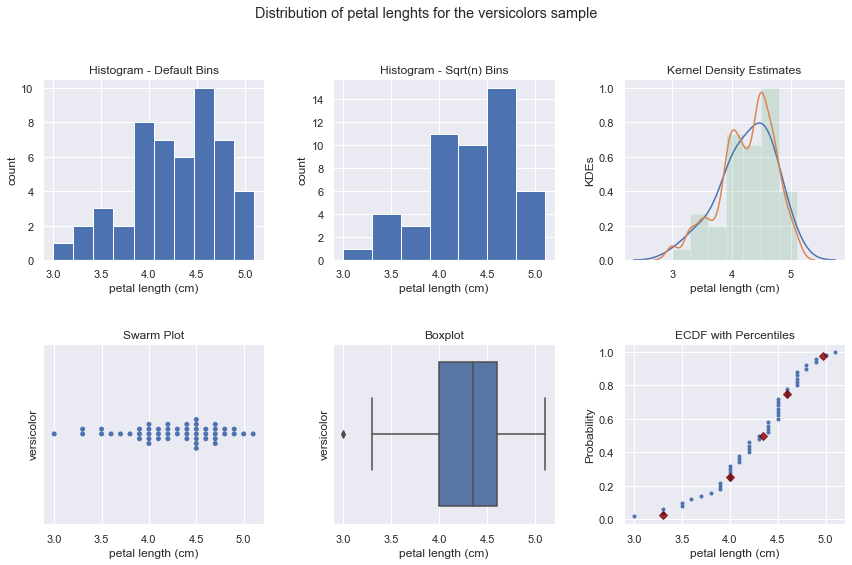

In [4]:
# fig
fig, [[ax00, ax01, ax02], [ax10, ax11, ax12]] = plt.subplots(nrows=2, ncols=3, figsize = (3 * 4, 2 * 4))

# paramters
len_vers = len(versicolor_petal_length)
percentiles = np.array([2.5, 25, 50, 75, 97.5])

# Plot histograms, swarmplot & boxplot
_ = ax00.hist(versicolor_petal_length)
_ = ax01.hist(versicolor_petal_length, bins=int(np.sqrt(len_vers)))
_ = sns.swarmplot(y='species', x='petal length (cm)', data=iris_df.loc[iris_df['species'] == 'versicolor'], ax=ax10)
_ = sns.boxplot(y='species', x='petal length (cm)', data=iris_df.loc[iris_df['species'] == 'versicolor'], ax=ax11)

# kde with several smoothing bandwidths
_ = sns.kdeplot(versicolor_petal_length, ax=ax02)
_ = sns.kdeplot(versicolor_petal_length, bw=.1, ax=ax02)
_ = ax02.hist(versicolor_petal_length, bins=int(np.sqrt(len_vers)), alpha=0.2, normed=True)

# ecdf with percentiles
x_vers, y_vers = ecdf(versicolor_petal_length)
ptiles_vers = np.percentile(versicolor_petal_length, percentiles)
_ = ax12.plot(x_vers, y_vers, marker = '.', linestyle = 'none')
_ = ax12.plot(ptiles_vers, percentiles/100, marker='D', color='maroon', linestyle='none', alpha=0.8)

# Label axes
for ax in (ax00, ax01, ax02, ax12):
    _ = ax.set_xlabel("petal length (cm)")
    _ = ax.set_ylabel('count')

for ax in (ax10, ax11):
    _ = ax.set_yticks([])
    _ = ax.set_ylabel('versicolor', rotation=90)

_ = ax02.set_ylabel('KDEs')
_ = ax12.set_ylabel('Probability')

# titles
_ = ax00.set_title('Histogram - Default Bins')
_ = ax01.set_title('Histogram - Sqrt(n) Bins')
_ = ax02.set_title('Kernel Density Estimates')
_ = ax10.set_title('Swarm Plot')
_ = ax11.set_title('Boxplot')
_ = ax12.set_title('ECDF with Percentiles')

_ = fig.suptitle('Distribution of petal lenghts for the versicolors sample')

plt.tight_layout(rect=[0, 0, 1, 0.9], h_pad=3, w_pad=2.5)


## Comparing several distributions

Boxplots and ECDFs can also be used to compare two or more distributions. The example below expose clear differences among the species. Setosa is much shorter, also with less absolute variability in petal length than versicolor and virginica.


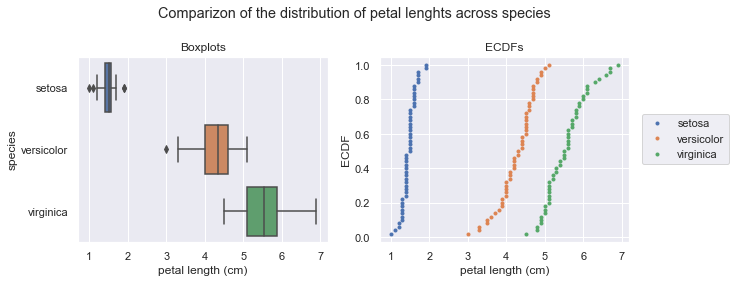

In [5]:
# fig
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize = (2 *5, 1 * 4))

# boxplots
_ = sns.boxplot(y='species', x='petal length (cm)', data=iris_df, ax=ax1)

# compared ecdfs
x_seto, y_seto = ecdf(setosa_petal_length)
x_virg, y_virg = ecdf(virginica_petal_length)
_ = ax2.plot(x_seto, y_seto, marker='.', linestyle='none', label='setosa')
_ = ax2.plot(x_vers, y_vers, marker='.', linestyle='none', label='versicolor')
_ = ax2.plot(x_virg, y_virg, marker='.', linestyle='none', label='virginica')

# labels
_ = ax2.set_xlabel('petal length (cm)')
_ = ax2.set_ylabel('ECDF')

# titles
_ = ax1.set_title('Boxplots')
_ = ax2.set_title('ECDFs')

fig.suptitle('Comparizon of the distribution of petal lenghts across species')

# legend
handles, labels = ax2.get_legend_handles_labels()

plt.tight_layout(rect=[0, 0, 0.9, 0.9])
_ = fig.legend(handles, labels, loc='right', bbox_to_anchor=(1.02, 0.5))
